# 1. Simple coin flip exercise

You have a coin that when flipped ends up head with probability $p$ and ends up tail with probability $1−p$. The value of $p$ is unknown.

Flipping the coin $\bf{n}$ times you end up with $\bf{k}$ heads. The objective of this exercise is to estimate the probability distribution of $p$ using this data.

Credits: 
- Panos Ipeirotis, https://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

## Import librairies

In [310]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.special as sc
from scipy.stats import beta     # beta probability distribution function

## Parameters of the exercise

In [311]:
k,n = 100,140 # number of heads and trials

> 1. What could be a coarse estimation of $p$?

a coarse estimation of $p$ could be : $p = \frac{k}{n} = \frac{5}{7}$

We suppose that the coin is fair, so the probability of getting a head is equal to the probability of getting a tail.

## Bayesian treatment: mathematical approach

We will see that, for this particular exercice, it is actually straightforward to access p. Here, p is not a value, it's a distribution and to compute it we start from the Bayes rule:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)},
$$

where $P(data | p)$ is given by the Binomial distribution which determines the probability of observing k "heads" in  n flip when the probability of success (head result) is given by p:

$$
P(data|p) = P(k|p,n) = \binom nk p^k (1-p)^{n-k}, \,\,\, \text{with the binomial coefficient: } \binom nk = \frac{n!}{k! (n-k)!}.
$$


Now, for the prior distribution $P(p)$, a very convenient choice for this scenario (also known as the conjugate prior of the binomial) is the <a href="https://en.wikipedia.org/wiki/Beta_distribution#Shapes">Beta distribution</a>, $Beta(p|a,b)$ defined as:

$$
Beta(p|a,b) =  \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

where $B$ is the <a href="https://en.wikipedia.org/wiki/Beta_function">beta function</a> (not to be mistaken with the beta distribution !) and is a normalization constant to ensure that the probability integrates to 1. A distribution $Beta(p|a,b)$ has a mean of $\frac{a}{a+b}$.

---

> 2. With some simple calculations, show that the posterior is of the same distribution family as the prior (Beta distribution) and that the posterior distribution comes down to:

$$
P(p|data) = Beta(p|k+a, n - k + b) 
$$

***Thus the posterior of this problem depends of the data (k and n) and the two parameters (a and b) that defines the prior !***

## 1.1. Prior and posterior distributions

The Beta distribution, for parameters $a$ and $b$, is given by the function ```beta.pdf(x,a,b)``` 

> 3. Plot the shape of the prior for different values of a and b.


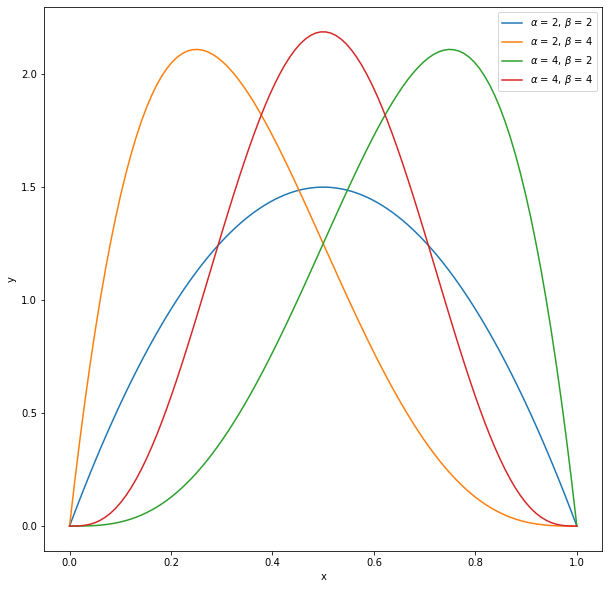

In [312]:
a = [2, 4]
b = [2, 4]

# Prior distribution
plt.figure(figsize=(10, 10))
for i in range(len(a)):
    for j in range(len(b)):
        x = np.linspace(0, 1, 100)
        y = beta.pdf(x, a[i], b[j])
        plt.plot(x, y, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a[i], b[j]))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

> 4. Why could it be a good choice to choose a symmetric ($a=b$) prior?

It could be a good choice to choose a symmetric ($a=b$) prior because as show in the plot below, the mean of the distribution is equal to $\frac{a}{a+b}$, so if $a=b$ then the mean is equal to $\frac{1}{2}$ which is the mean of a fair coin. it is a non-informative prior. Since we don't have any information about the probability of getting a head or a tail. So we can assume that the probability of getting a head is equal to the probability of getting a tail.

### 1.1.a) Model 1: uniform prior

> 5. For Model 1, choose an uniform prior ($a_1=b_1=1$) and plot the corresponding posterior distribution.

No handles with labels found to put in legend.


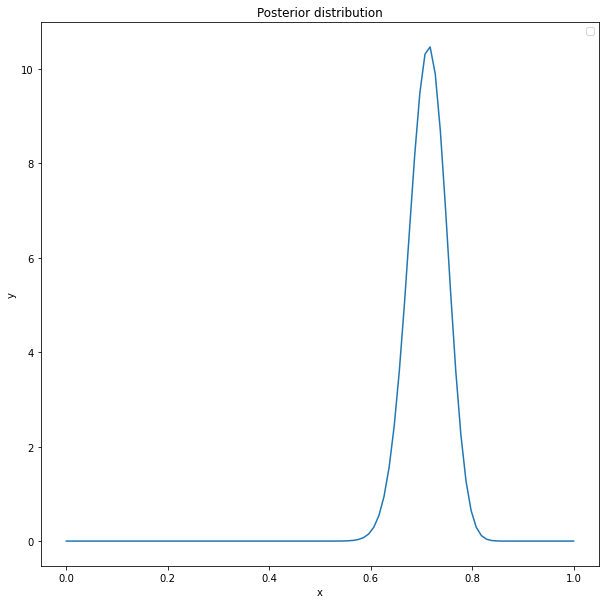

In [313]:
a_1, b_1 = 1, 1

# Posterior distribution
plt.figure(figsize=(10, 10))
x_1 = np.linspace(0, 1, 100)
y_1 = beta.pdf(x_1, a_1 + k, b_1 + n - k)
plt.plot(x_1, y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posterior distribution')
plt.legend()

> 6. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Is it consistent with your coarse estimation of $p$? How do they behave with the amount of data ($k$ and $n$)?

MMSE estimator is a mode : $p_{MMSE} = \frac{k+a-1}{n+a+b-2} = \frac{k}{n} = \frac{5}{7}$ 

MAP estimator : $p_{MAP} = \frac{k+a}{n+a+b} = \frac{k+1}{n+2} = \frac{101}{142}$

The MMSE estimator is consistent with our coarse estimation of $p$ because it is equal to $\frac{k}{n}$. But the MAP estimator is not consistent with our coarse estimation of $p$ because it is equal to $\frac{k}{n} - \frac{1}{n+a+b-2}$.

With the amount of data ($k$ and $n$), the MMSE estimator and the MAP estimator are getting closer to the coarse estimation of $p$.


### 1.1.b) Model 2: peaked prior

> 7. Now, for Model 2, plot the posterior distribution for a 'peaked' prior (e.g. $a_2=b_2=10$) and comment in comparison to Model 1.

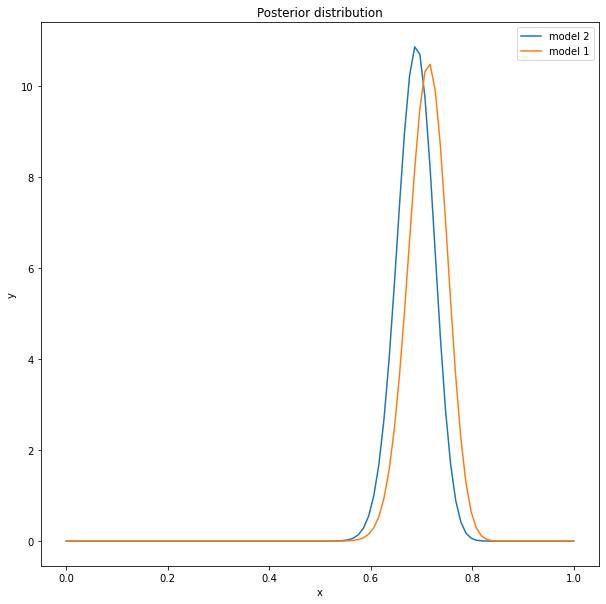

In [314]:
# Posterior distribution for a "peaked" prior
plt.figure(figsize=(10, 10))
a_2, b_2 = 10, 10
x_2 = np.linspace(0, 1, 100)
y_2 = beta.pdf(x, a_2 + k, b_2 + n - k)
plt.plot(x_2, y_2, label='model 2')
plt.plot(x_1, y_1, label='model 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posterior distribution')
plt.legend()

Comment : The posterior distribution for a 'peaked' is more peaked than the posterior distribution for a uniform prior. The mean of the posterior distribution is equal to $\frac{a+k}{a+b+n}$, so the mean of the posterior distribution is a litle translated to the right in comparison to Model 1.

> 8. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for Model 2. Comment in comparison to Model 1.

MMSE estimator is a mode : $p_{MMSE} = \frac{k+a-1}{n+a+b-2} = \frac{k+9}{n+18}$

MAP estimator : $p_{MAP} = \frac{k+a}{n+a+b} = \frac{k+10}{n+20}$

The MMSE estimator and the MAP estimator for Model 2 are closer to the coarse estimation of $p$ than the MMSE estimator and the MAP estimator for Model 1. The MMSE estimator and the MAP estimator for Model 2 are closer to the coarse estimation of $p$ because the prior distribution is more peaked than the prior distribution for Model 1. So the prior distribution for Model 2 is more informative than the prior distribution for Model 1.

### 1.1.c) Model 3: Very peaked prior

> 9. For Model 3, plot the posterior distribution for a 'peaked' prior (e.g. $a_3=b_3=100$) and comment in comparison to Models 1 and 2.

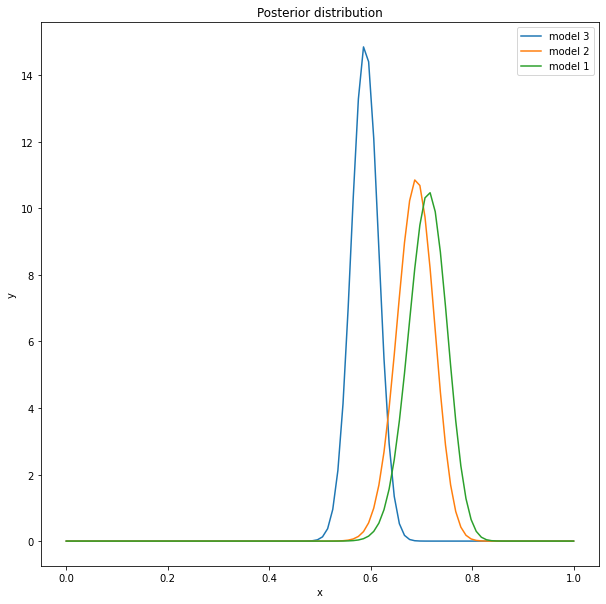

In [315]:
a_3, b_3 = 100, 100
plt.figure(figsize=(10, 10))
x_3 = np.linspace(0, 1, 100)
y_3 = beta.pdf(x, a_3 + k, b_3 + n - k)
plt.plot(x_3, y_3, label='model 3')
plt.plot(x_2, y_2, label='model 2')
plt.plot(x_1, y_1, label='model 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Posterior distribution')
plt.legend()    

> 10. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Comment in comparison to Models 1 and 2.

MMSE estimator is a mode : $p_{MMSE} = \frac{k+a-1}{n+a+b-2} = \frac{k+99}{n+198}$

MAP estimator : $p_{MAP} = \frac{k+a}{n+a+b} = \frac{k+100}{n+200}$

The MMSE estimator and the MAP estimator for Model 3 are closer to the coarse estimation of $p$ than the MMSE estimator and the MAP estimator for Model 1 and Model 2. The MMSE estimator and the MAP estimator for Model 3 are closer to the coarse estimation of $p$ because the prior distribution is more peaked than the prior distribution for Model 1 and Model 2. So the prior distribution for Model 3 is more informative than the prior distribution for Model 1 and Model 2.

## 1.2. Bayes factor

For comparing the plausibility of two models, we can resort to <a href="https://en.wikipedia.org/wiki/Bayes_factor">Bayes factors</a>.

The Bayes factor is the ratio of the marginal likelihoods of the two models, that is, the likelihoods of two statistical models integrated over the prior probabilities of their parameters. Here instead of comparing models, we can now also compare hypotheses encoded in the form of priors.

The marginal likelihood is given by:
$$
P(data) = \int P(data | p)P(p)dp
$$

The Bayes factor K for comparing the plausibility of two models is:
$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)} = \frac{\int P(data | p,  \text{Model}_1)P(p |  \text{Model}_1)dp}{\int P(data | p,  \text{Model}_2)P(p |  \text{Model}_2)dp}.
$$

A value of K > 1 means that Model1 is more strongly supported by the data under consideration than Model2. The relative strength of a Bayes factor can be determined by consulting the <a href="https://en.wikipedia.org/wiki/Bayes_factor#Interpretation">interpretation tables</a>.


For the binomial model (with a conjugate Beta prior) the Bayes factor is easily calculated:

$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)}  = \frac{B(k+a_1,n-k+b_1)}{B(a_1,b_1)} \times \frac{B(a_2,b_2)}{B(k+a_2,n-k+b_2)}.
$$

Here $B$ is the beta function.

> 11. Calculate the Bayes factors corresponding to the comparison of the three models used above (uniform prior, 'peaked' prior and 'very peakd' prior). Hint: to ease numerical calculation it is better to consider the logarithm of the beta function ```sc.betaln``` (instead of the beta function ```sc.beta``` that can have very low values). Conclude on which model to choose.

In [316]:
# Bayes factors for the three models take the sc.betaln function to avoid overflow

# Bayes factor for model 1 vs model 2
ln_B_12 = sc.betaln(a_1 + k, b_1 + n - k) - sc.betaln(a_2 + k, b_2 + n - k) + sc.betaln(a_2, b_2) - sc.betaln(a_1, b_1)

# Bayes factor for model 2 vs model 3
ln_B_23 = sc.betaln(a_2 + k, b_2 + n - k) - sc.betaln(a_3 + k, b_3 + n - k) + sc.betaln(a_3, b_3) - sc.betaln(a_2, b_2)

# Bayes factor for model 1 vs model 3
ln_B_13 = sc.betaln(a_1 + k, b_1 + n - k) - sc.betaln(a_3 + k, b_3 + n - k) + sc.betaln(a_3, b_3) - sc.betaln(a_1, b_1)

print('log(B_12) = ', ln_B_12)
print('log(B_23) = ', ln_B_23)
print('log(B_13) = ', ln_B_13)

log(B_12) =  0.3763747941767601
log(B_23) =  5.483226611859985
log(B_13) =  5.859601406036745


$$ K_{12} = \exp(B_{12}) > 1 $$
$$ K_{23} = \exp(B_{23}) > 1 $$
$$ K_{13} = \exp(B_{13}) > 1$$

So, according to the Bayes factors, Model 1 is preferred over Model 2, and Model 1 is also preferred over Model 3.

## 1.3. Making predictions

In Bayesian inference we can use our probabilistic statements about the parameter from the posterior for making predictions. This is usually refered to as <a href="https://en.wikipedia.org/wiki/Posterior_predictive_distribution">posterior predictive distribution</a>. 


This is the distribution of unobserved data, conditioned on observed data and prior. It follows the idea as the marginal likelihood discussed above (which can be seen as a prior predictive distribution), namely that we want to evaluate new data on our fitted model. 

We can write the posterior predictive distribution for some new unseen data $x$, as the marginal of a distribution conditioned on observed data and prior:

$$
P(x |data) = \int P(x|p)P(p |data)dp
$$

where $data$ refers to our training data, and $x$ to some new unseen data.

> 12. For the beta-binomial model, compute $P(j | m,k,n,a,b)$ where $j$ refers to the new number of Heads, $m$ to the new number of total flips, $k$ to the previous number of Heads, $n$ to the previous number of total flips, and $a$ and $b$ to our prior hyperparameters.


$$
P(j | m,k,n,a,b) = \int 
P(j|m,p)P(p |k,n,a,b)dp= \binom{m}{j} \frac{B(k+j+a,n-k+m-j+b)} {B(a+k,b+n-k)}
$$


In [317]:
def p_1(j, new_flips=2):
    a_1 = b_1 = 1
    n = 140
    k = 100

    # Corrected combinatorial term
    combi = sc.comb(new_flips, j, exact=True)

    # Corrected beta function terms
    beta_1 = sc.beta(k + j + a_1, n - k + new_flips - j + b_1)
    beta_2 = sc.beta(a_1 + k, b_1 + n - k)

    return combi * beta_1 / beta_2

> 13. Calculate the probability of flipping 2 heads out of 2 new flips with the model you selected as the best in the previous question

In [318]:
# probability of flipping 2 heads out of 2 new flips given model 1
print('p_1 = ', p_1(2))

p_1 =  0.5073377326898455


> 14. Calculate the probability of flipping 3 heads out of 5 new flips with the model you selected as the best in the previous question

In [319]:
# probability of flipping 3 heads out of 5 new flips given model 1
print('p_1 = ', p_1(3, new_flips=5))

p_1 =  0.29517813564880574


> 15. What can you conclude about the quality of these predictions? How will the prediction probability behave with increasing number of new flips? Check by producing the plot of the prediction probability of any $j$ with values of m between $1$ and $200$ for instance.


<ipython-input-317-ab57e4696c39>:13: RuntimeWarning: invalid value encountered in double_scalars
  return combi * beta_1 / beta_2


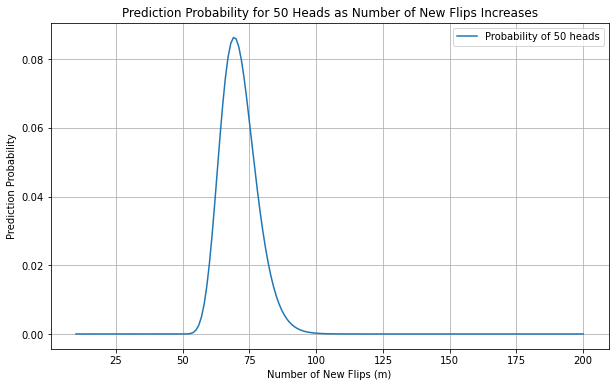

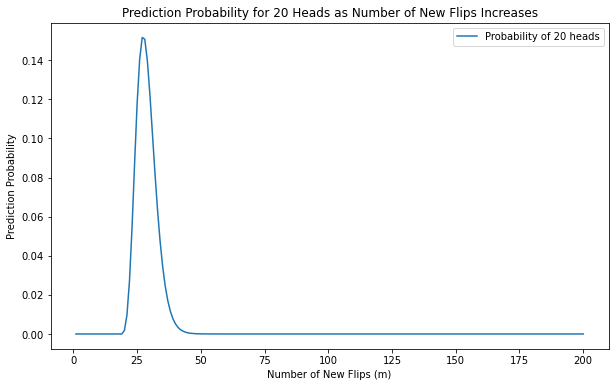

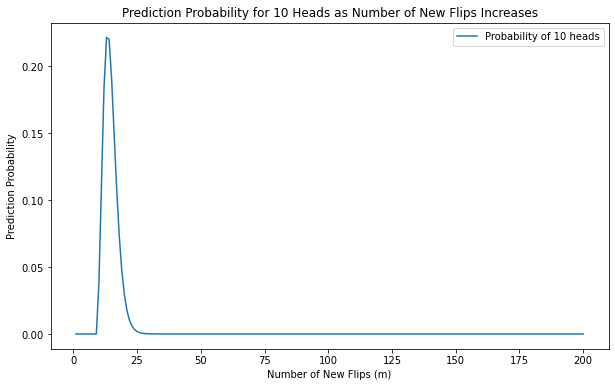

In [320]:
# Plotting the prediction probability for j = 50 as m varies from 1 to 200
m_values = range(1, 201)  # Range of m from 1 to 200
probabilities_70 = [p_1(50, m) for m in m_values]

probabilities_40 = [p_1(20, m) for m in m_values]

probabilities_10 = [p_1(10, m) for m in m_values]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(m_values, probabilities_70, label="Probability of 50 heads")
plt.xlabel("Number of New Flips (m)")
plt.ylabel("Prediction Probability")
plt.title("Prediction Probability for 50 Heads as Number of New Flips Increases")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(m_values, probabilities_40, label="Probability of 20 heads")
plt.xlabel("Number of New Flips (m)")
plt.ylabel("Prediction Probability")
plt.title("Prediction Probability for 20 Heads as Number of New Flips Increases")
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(m_values, probabilities_10, label="Probability of 10 heads")
plt.xlabel("Number of New Flips (m)")
plt.ylabel("Prediction Probability")
plt.title("Prediction Probability for 10 Heads as Number of New Flips Increases")
plt.legend()

As the three graphs are quite similar, let analyse the graph 1:

The plot illustrates how the probability of obtaining exactly 70 heads evolves as the number of new coin flips ($m$) ranges from 1 to 200.  When $m$ is small, the probability exhibits noticeable variability. This variation is expected since a small number of flips does not provide a stable basis for predicting a precise outcome of 70 heads. Importantly, when the number of new flips ($m$) is less than 70, the probability is zero. This outcome is logical, as achieving 70 heads is not feasible in less than 70 flips. As the number of flips ($m$) grows larger, the probability tends to stabilize. This trend indicates that the model's predictions become more consistent and less dependent on the initial prior as more data is introduced. However, the likelihood of getting exactly 70 heads remains relatively low, diverging from the proportion seen in the historical data (100 heads in 140 flips). In certain scenarios where $m$ is too small to support 70 heads, or the parameters render the beta function calculations untenable, the predictions become invalid, resulting in zero or undefined probabilities.

- The accuracy and reliability of the predictions are closely tied to the number of new flips in relation to the anticipated number of heads. Predictions that align more closely with the previously observed frequency (i.e., the ratio of heads in past flips) tend to have higher probabilities.

- With an increasing count of new flips, the model gradually shifts from being predominantly influenced by the prior to being more guided by the actual data. This shift leads to more reliable predictions, assuming that the predicted number of heads is plausible within the given total number of flips.


# 2. The lighthouse problem

The following is a classic estimation problem called the "lighthouse problem". The figure shows a set of receivers distributed at coordinates $x_k$ along the shore and a lighthouse located at some position $(\alpha,\beta)$ offshore. The idea is that the coastline is equipped with a continuous strip of photodetectors. The lighthouse flashes the shore $N$ times at some random angle $\theta_k$. The strip of  photodetectors registers the $k^{th}$ flash position $x_k$, but the angle $\theta_k$ of the flash is unknown. Furthermore, the lighthouse beam is laser-like so there is no smearing along the strip of photodetectors. In other words, the lighthouse is actually more of a disco-ball in a dark nightclub.

The problem is how to estimate $\alpha$ given we already have $\beta$.

Credits:
- Data Analysis: Bayesian tutorial. D.S.Sivia.

<img src="Lighthouse_schematic.jpg" width="600">

Given the nature of the lighthouse emission it seems reasonable to assign an uniform density function to the angle $\theta_k$, such that it is uniformly distributed between $\pm \pi/2$:
$$ P(\theta_k|\alpha, \beta) = \frac{1}{\pi} $$

Now, what we really want is the density function for $x_k$ which will tell us the probability that the $k^{th}$ flash will be recorded at position $ x_k $. From basic trigonometry, we have the following:

$$ \beta \tan(\theta_k) = x_k - \alpha $$

Thus, after a transformation of variables, we obtain the following:

$$ P(x_k|\alpha, \beta) = \frac{\beta}{\pi \left[\beta ^2 +(x_k-\alpha)^2 \right]}. $$

This distribution is known as the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution).




## 2.1. Data generation

First we'll generate some toy data that will be used in this exercise. We assume that the 'true' values of the parameters that we want to infer are $\alpha = \beta = 1$.

> 16. Run the cell below to generate N=250 values of the angle $\theta_k$ uniformely distributed between $-\pi/2$ and $+\pi/2$ and to calculate the corresponding $x_k$ values.

In [321]:
def generate_data(N):
    theta_k= np.random.uniform(-np.pi/2, np.pi/2, size=N)
    return theta_k, beta * np.tan(theta_k) + 1

In [322]:
# generate  N angles between -pi/2 and pi/2
N = 250
beta = 1
theta_k, x_samples = generate_data(N)

> 17. Make a histogram of the $\theta_k$ and $x_k$ values


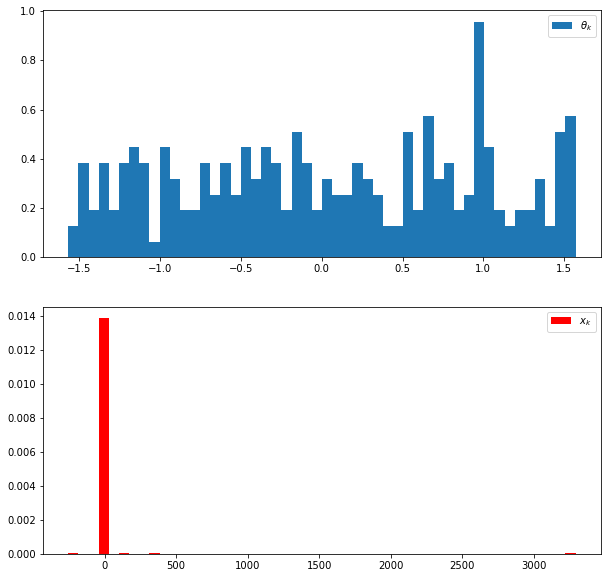

In [323]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.hist(theta_k, bins=50, density=True, label=r'$\theta_k$')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(x_samples, bins=50, density=True, color='red',label=r'$x_k$')
plt.legend()

>
> 18. Define the function $P(x_k|\alpha, \beta)$ and draw it for fixed $\alpha = \beta = 1$ values.

In [324]:
def p_x(x, alpha=1, beta=1):
    return 1 / (np.pi * beta * (1 + ((x - alpha) / beta)**2))

## 2.2. Bayesian inference

Given a set of observed measurements $\{x_k\}$ we can infer the position along the shore of the lighthouse, $\alpha$, by the posterior pdf $P(\alpha|\{x_k\},\beta)$. Here, to simplify the problem, we assume that the distance to the coast, $\beta$, is known. Writing down the Bayes theorem we have:

$$
P(\alpha|\{x_k\},\beta) \propto P(\{x_k\}|\alpha,\beta) P(\alpha|\beta).
$$

As the knowledge of $\beta$, without the data, tells us nothing new about the position $\alpha$, let us assign a single uniform pdf to the prior:

$$
P(\alpha|\beta) = P(\alpha) \begin{cases}
 A & \alpha_\text{min} \leq \alpha \leq \alpha_\text{max} \\
 0 & \text{otherwise}
\end{cases}
$$

where $A$ is a constant and $\alpha_\text{min}$ and $\alpha_\text{max}$ represent the limit of the coastline.

$P(\{x_k\}|\alpha,\beta)$ is the likelihood of the data that is just the product of the probabilities for obtaining the N individual observations $x_k$:

$$
P(\{x_k\}|\alpha,\beta) = \prod_{k=1}^N P(x_k|\alpha,\beta).
$$

From the equations above one can write the logarithm of the posterior distribution as:

$$\mathcal{L}(\alpha)= \log P(\alpha|\{x_k\},\beta) = \text{constant}- \sum_{k=1}^N \ln \left[ \beta^2 + (x_k-\alpha)^2 \right]
$$

The MAP estimate of the position $\alpha$ is given by the maximum of the posterior pdf. Taking the first derivative gives us the equation we would have to solve:

$$
\frac{d \mathcal{L}}{d \alpha} = 2 \sum_{k=1}^N \frac{x_k-\alpha}{\beta^2+(x_k-\alpha)^2}=0.
$$

Unfortunately, there is no easy way to solve for the optimal $\alpha$ for this equation. However, nothing can prevent us from addressing this problem numerically.

For this we will use brute force to evaluate $\mathcal{L}(\alpha)$ for a range of possible values $\alpha$:

> 19. Implement the function $\mathcal{L}(\alpha)$. We can ignore the constant in this expression as we will deal with it below,

In [325]:
def logposterior(alpha,x_samples,beta):
    return -1 * np.sum(np.log(np.power(x_samples-alpha,2)+beta**2))

>
> 20. Calculate $\mathcal{L}(\alpha)$ with the available data and for a grid of values in the range $-3 \leq \alpha \leq 3$. Then subtract the maximum value of $\mathcal{L}(\alpha)$ to $\mathcal{L}(\alpha)$

In [326]:
aa = np.linspace(-3,3,100)
llog = []
for a in aa:
    llog += [logposterior(a,x_samples,beta)]

llog = np.array(llog)
llog -= np.max(llog) # Subtract max value

> 21. Finally plot the posterior distribution $P(\alpha|\{x_k\},\beta) = \exp(\mathcal{L}(\alpha))$ as a function of $\alpha$.

Text(0.5, 1.0, 'Posterior distribution for N = 250 events')

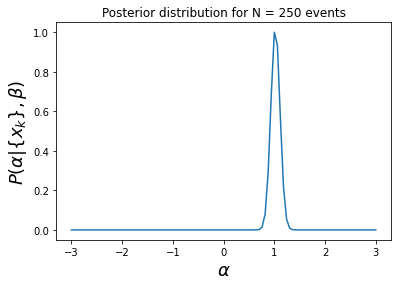

In [327]:
posterior = np.exp(llog)
plt.plot(aa,posterior)
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$',fontsize=18)
plt.title('Posterior distribution for N = %d events' % N)

> 22. Print out the maximum posterior estimate

maximum posterior estimate = 1.000


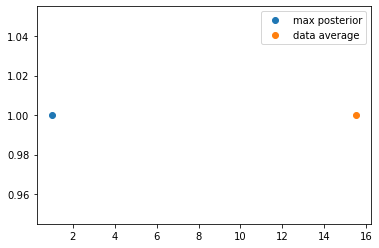

In [328]:
ymax = np.max(posterior)
xpos = np.where(posterior == ymax)
alpha_max = aa[xpos]
plt.plot(alpha_max,ymax,'o',label='max posterior')
plt.plot(x_samples.mean(),ymax,'o',label='data average')
plt.legend()

print('maximum posterior estimate = %.3f' % alpha_max[0])

## 2.3. Comparing maximum posterior estimate and plain averaging

The best estimator for a mean $\mu$ of a normal distribution is simply given by the sample average. As in the limit of large numbers all distributions should behave as a normal distribution (this is the Central Limit Theorem) why didn't we just take the average of the $\lbrace x_k \rbrace$ and use that to estimate $\alpha$?

We will see here that in the present case, this is a bad idea!

> 23. Run the full procedure above 10 times. At each trial generate a new sample, then compare the maximum posterior estimate with the sample average. Do these result seem to agree ?
>
> 24. Now let's explore this problem by performing a large number of trials (say 100), Make a plot showing, as a function of the trial number, the posterior maximum estimate and the sample average with its standard deviation. What is your conclusion ? 


Trial 1
maximum posterior estimate = 0.879
alpha using average = 0.277 +- 0.548
Trial 2
maximum posterior estimate = 0.939


alpha using average = 7.484 +- 6.655
Trial 3
maximum posterior estimate = 0.879
alpha using average = 2.343 +- 3.108
Trial 4
maximum posterior estimate = 1.121
alpha using average = -0.788 +- 2.774
Trial 5
maximum posterior estimate = 1.121
alpha using average = 2.669 +- 2.609
Trial 6
maximum posterior estimate = 0.939
alpha using average = 1.131 +- 0.541
Trial 7
maximum posterior estimate = 0.939
alpha using average = -28.586 +- 30.805
Trial 8
maximum posterior estimate = 1.000
alpha using average = 0.086 +- 0.503
Trial 9
maximum posterior estimate = 0.818
alpha using average = 1.650 +- 1.034
Trial 10
maximum posterior estimate = 1.182
alpha using average = -0.050 +- 0.831


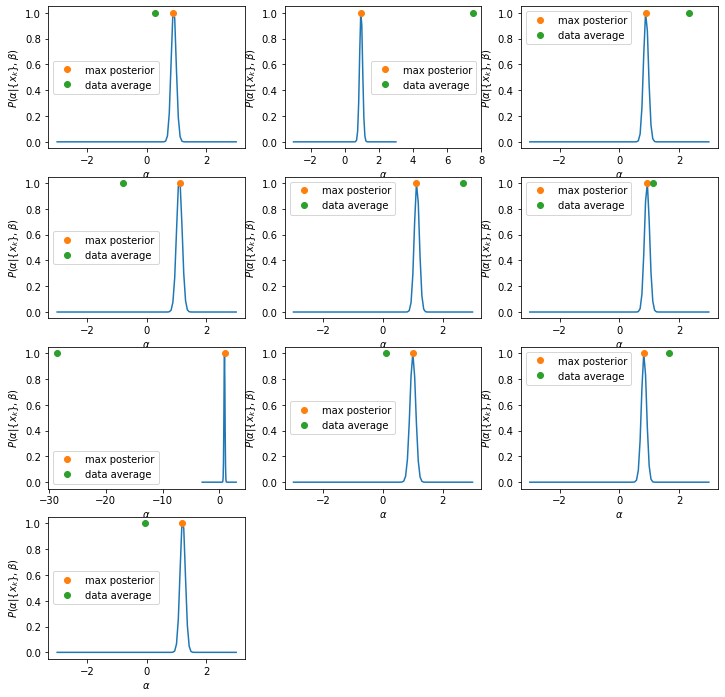

In [329]:
# 23)
Ntrial = 10

def runtrial(do_plot=True):

    # generate new data
    theta_samples, x_samples = generate_data(N)
    
    # Calculate posterior
    aa = np.linspace(-3,3,100)
    llog = []
    for a in aa:
        llog += [logposterior(a,x_samples,beta)]
        
    llog = np.array(llog)
    llog -= np.max(llog) # Subtract max value
    
    posterior = np.exp(llog)

    ymax = np.max(posterior)
    xpos = np.where(posterior == ymax)
    alpha_max = aa[xpos]

    sample_mean = x_samples.mean() # mean
    sample_mean_error = x_samples.std() / np.sqrt(N)
    
    if do_plot:
        plt.plot(aa,posterior)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$')
        #plt.title('Posterior distribution for N = %d events' % N)

        plt.plot(alpha_max,ymax,'o',label='max posterior')
        plt.plot(x_samples.mean(),ymax,'o',label='data average')
        plt.legend()
   
    return alpha_max[0], sample_mean, sample_mean_error, np.median(x_samples)

plt.figure(figsize=(12,12))
for i in range(Ntrial):
    print('Trial %d' % (i+1))
    plt.subplot(4,3,i+1)
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(True)
    print('maximum posterior estimate = %.3f' % alpha_max)
    print('alpha using average = %.3f +- %.3f' % (sample_mean,sample_mean_error))


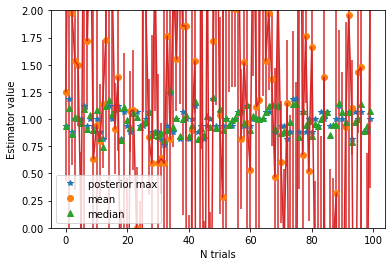

In [330]:
# 24)

Ntrial = 100

posterior_max = []
mean = []
mean_error = []
median = []

for i in range(Ntrial):
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(False)
    posterior_max += [alpha_max]
    mean += [sample_mean]
    mean_error += [sample_mean_error]
    median += [sample_median]
    
plt.plot(range(Ntrial), posterior_max, '*',label='posterior max')
plt.plot(range(Ntrial), mean, 'o',label='mean')
plt.plot(range(Ntrial), median, '^',label='median')
plt.errorbar(range(Ntrial), mean, yerr=mean_error)
plt.ylim(0,2)
plt.xlabel('N trials')
plt.ylabel('Estimator value')
plt.legend()    

In [331]:
print('Mean of posterior max values: %.3f +- %.3f' %(np.array(posterior_max).mean(),np.array(posterior_max).std()))
print('Mean of median values: %.3f +- %.3f' %(np.array(median).mean(),np.array(median).std()))
print('Mean of average values: %.3f +- %.3f' %(np.array(mean).mean(),np.array(mean).std()))

Mean of posterior max values: 0.984 +- 0.100
Mean of median values: 0.986 +- 0.105
Mean of average values: 0.068 +- 5.622


Conclusion: you should observe that the estimate using the average has enormous variance. This is a consequence of the fact that the Cauchy distribution is very peculiar as it has no defined mean or variance! Therefore the Central Limit Theorem is not applicable to the Cauchy distribution.

The morale of this exercise is that the sample mean is not alway a good number to use, and in this particular case it is best to use more refined knowledge of the posterior pdf to determine what is best. Such knowledge can be gained by outputting samples from such distributions by Monte Carlo methods.

> 25. What other estimate than the averaged sample value could be used to estimate $\alpha$? Add this new estimator to your answer to the previous questions 23 and 24 

Besides the averaged sample value, another estimator that can be used is the median of the posterior distribution. The median, being a more robust measure of central tendency, can be particularly effective in distributions like the Cauchy distribution, which lacks a defined mean and is sensitive to outliers.

Trial 1: Median of Posterior = 1.000
Trial 2: Median of Posterior = 1.121
Trial 3: Median of Posterior = 1.061
Trial 4: Median of Posterior = 0.939
Trial 5: Median of Posterior = 1.061
Trial 6: Median of Posterior = 1.061
Trial 7: Median of Posterior = 1.061
Trial 8: Median of Posterior = 1.000
Trial 9: Median of Posterior = 0.939
Trial 10: Median of Posterior = 1.121


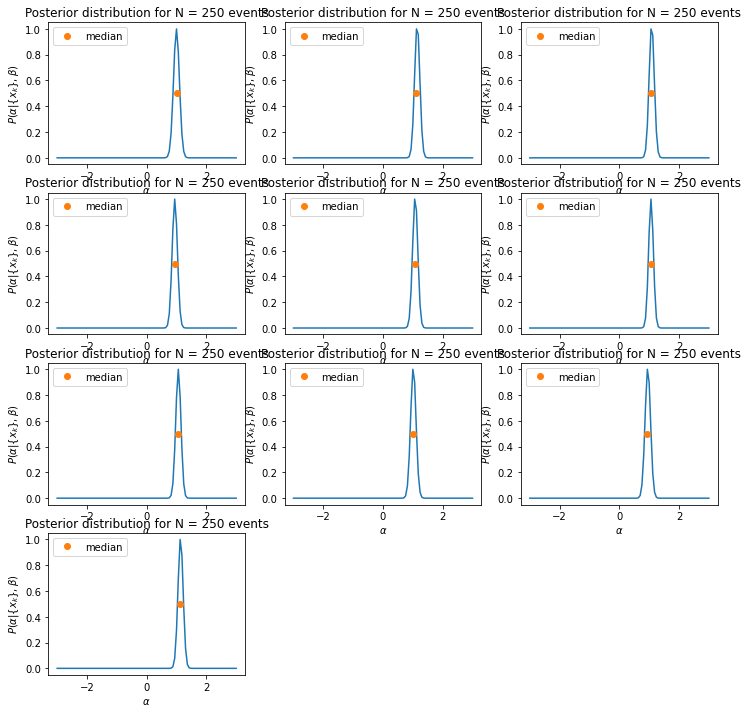

In [332]:
# Redefining the median_posterior function
def median_posterior(x_samples, beta, aa, do_plot=True):
    llog = [logposterior(a, x_samples, beta) for a in aa]
    llog = np.array(llog)
    llog -= np.max(llog)  # Subtract max value to avoid numerical issues
    posterior = np.exp(llog)
    
    # Calculating the cumulative distribution of the posterior
    cumulative_posterior = np.cumsum(posterior)
    cumulative_posterior /= cumulative_posterior[-1]  # Normalize to 1

    # Finding the median of the posterior distribution
    median_index = np.where(cumulative_posterior >= 0.5)[0][0]
    median_alpha = aa[median_index]

    if do_plot:
        plt.plot(aa, posterior)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$')
        plt.title('Posterior distribution for N = %d events' % N)

        plt.plot(median_alpha, 0.5, 'o', label='median')
        plt.legend()
    return median_alpha

# Example usage in the context of the lighthouse problem
N = 250  # Number of observations
beta = 1  # Known distance to the coast
aa = np.linspace(-3, 3, 100)  # Range of possible alpha values

# Running trials to calculate median of the posterior
Ntrial = 10  # Number of trials
median_posteriors = []
plt.figure(figsize=(12, 12))
for i in range(Ntrial):
    # Generate new data for each trial
    theta_samples, x_samples = generate_data(N)

    # Calculate the median of the posterior
    plt.subplot(4, 3, i + 1)
    median_alpha = median_posterior(x_samples, beta, aa)
    median_posteriors.append(median_alpha)

# Print the median of the posterior for each trial
for i, median_alpha in enumerate(median_posteriors, 1):
    print(f'Trial {i}: Median of Posterior = {median_alpha:.3f}')


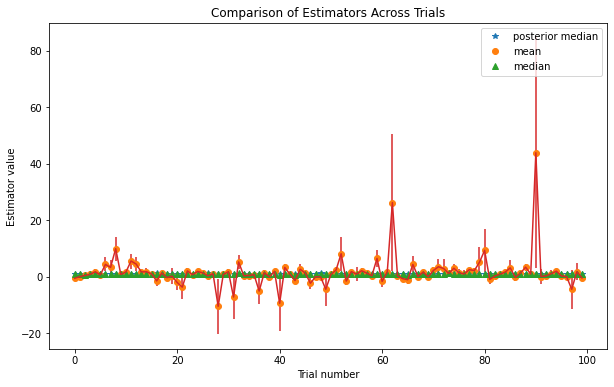

Mean of posterior median values: 1.005 ± 0.089
Mean of mean values: 1.649 ± 5.761
Mean of median values: 1.002 ± 0.093


In [333]:
# Parameters for the lighthouse problem
N = 250  # Number of observations
beta = 1  # Known distance to the coast
aa = np.linspace(-3, 3, 100)  # Range of possible alpha values

# Trials for question 23 and 24
Ntrial = 100
posterior_max = []
mean = []
mean_error = []
median = []

for i in range(Ntrial):
    # Generate new data
    theta_samples, x_samples = generate_data(N)
    
    # Calculate the median of the posterior
    median_alpha = median_posterior(x_samples, beta, aa, do_plot=False)
    
    # Store results
    posterior_max.append(median_alpha)
    mean.append(x_samples.mean())
    mean_error.append(x_samples.std() / np.sqrt(N))
    median.append(np.median(x_samples))

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(range(Ntrial), posterior_max, '*', label='posterior median')
plt.plot(range(Ntrial), mean, 'o', label='mean')
plt.plot(range(Ntrial), median, '^', label='median')
plt.errorbar(range(Ntrial), mean, yerr=mean_error)
plt.xlabel('Trial number')
plt.ylabel('Estimator value')
plt.legend()
plt.title('Comparison of Estimators Across Trials')
plt.show()

# Print summary statistics
print('Mean of posterior median values: {:.3f} ± {:.3f}'.format(np.mean(posterior_max), np.std(posterior_max)))
print('Mean of mean values: {:.3f} ± {:.3f}'.format(np.mean(mean), np.std(mean)))
print('Mean of median values: {:.3f} ± {:.3f}'.format(np.mean(median), np.std(median)))